# Bike Trips Dataset Analysis
## by Yousef Radwan

## Preliminary Wrangling

> The used dataset includes information about Ford GoBike trips. It includes information like the start and end time of the trip, the start and end station of the trip, in addition to multiple other fields.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [10]:
bike_df = pd.read_csv('biketripdata.csv')
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

- Each row describes a trip
- Each trip observation includes multiple fields including the start station and start time, end station and end time, in addition to detials about the member including his subscription type and his gender and birthyear and also the id of the used bike.

### What is/are the main feature(s) of interest in your dataset?

> The features I think are of interest are:
>- Distribution of trip duration, start/end times, start/end stations
>- Distribution of member subscription type, gender and age
>- Most used bikes according to id
>- Times of highest usage

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start time, end time, start station, end station, duration, member type, member birthyear, and member gender.

In [12]:
bike_df.info()
# Dropping rows with missing values
bike_df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

There seems to be a number of missing fields in about 8000 rows. Since this number is relatively small in comparison to the total number of observations (183 thousand), these rows will be removed.

In [13]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

We end up with 174952 rows in total. Now it's time to adjust some field data types.
1. start_time and end_time should have a dtype of datetime
2. start_station_id and end_station_id should be int types since the float type is of no value here.
3. user_type and member_gender can become a categorical dtype
4. member_birth_year should be an integer type

In [17]:
# Change time fields to datetime types
bike_df.start_time = pd.to_datetime(bike_df.start_time)
bike_df.end_time = pd.to_datetime(bike_df.end_time)

# Change ids and birth year to integer types
bike_df.start_station_id = bike_df.start_station_id.astype(int)
bike_df.end_station_id = bike_df.end_station_id.astype(int)
bike_df.member_birth_year = bike_df.member_birth_year.astype(int)

In [18]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [19]:
# Check available values for user type
bike_df.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [22]:
# Check available values for gender
bike_df.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [20]:
# Convert user type to categorical type
customer_types = ['Subscriber', 'Customer']
ctypes = pd.api.types.CategoricalDtype(customer_types, ordered=False)
bike_df.user_type = bike_df.user_type.astype(ctypes)

In [23]:
# Convert gender to categorical type
customer_genders = ['Male', 'Female', 'Other']
cgenders = pd.api.types.CategoricalDtype(customer_genders, ordered=False)
bike_df.member_gender = bike_df.member_gender.astype(cgenders)

In [24]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### What are the distributions of all the univariables? Are there trends that can be further investigated?

Let's first look at the average trip duration and the distribution in general.

<ipython-input-241-e845c53e77ff>:4: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,10000)


Text(0.5, 0, 'Trip Duration (seconds)')

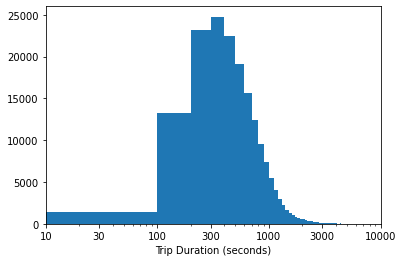

In [241]:
plt.hist(data=bike_df, x='duration_sec', bins = np.arange(0, bike_df.duration_sec.max()+100, 100))
# Log scale and Log ticks
xticks = [10, 30, 100, 300, 1000, 3000, 10000]
plt.xscale('log')
# Limit to 10000 to avoid extreme outliers
plt.xlim(0,10000)
plt.xticks(xticks, xticks)
plt.xlabel('Trip Duration (seconds)')

The distribution is roughly right-skewed. There are a few outliers which I will leave out using limits on the x-axis. There seems to be relatively very few trips with a duration less than 100 seconds which makes sense. The most frequent average trip duration seems to be near 300 with a gradual decrease from there on out. Let's take a closer look at that spike.

Text(0.5, 0, 'Trip Duration (seconds)')

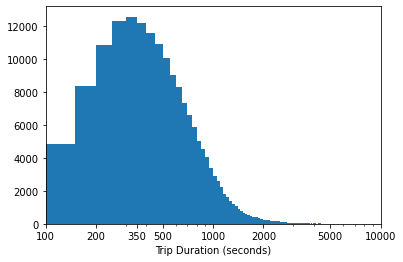

In [240]:
plt.hist(data=bike_df, x='duration_sec', bins = np.arange(0, bike_df.duration_sec.max()+50, 50))
xticks = [100, 200, 350, 500, 1000, 2000, 5000, 10000]
plt.xscale('log')
plt.xlim(100,10000)
plt.xticks(xticks, xticks)
plt.xlabel('Trip Duration (seconds)')

By reducing the bin size and limiting our x-axis, we get a closer look. Seems the peak is around 350 seconds or around 6 minutes. Next, I wanted to look for any patterns in the start and end stations.

### Due to the big number of stations, how dominant are the top few stations?

<AxesSubplot:xlabel='count', ylabel='start_station_name'>

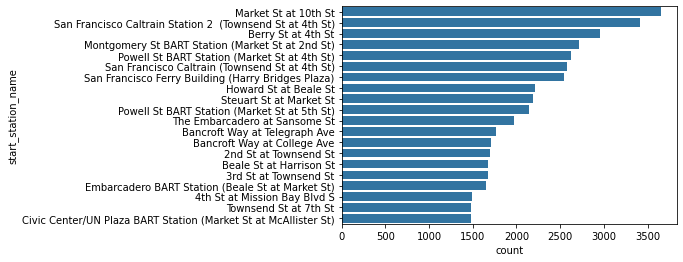

In [66]:
# Retrieve top 20 start station names
start_names = bike_df.start_station_name.value_counts().index[:20]
# Select subset of dataset with only those names
bike_df_sub = bike_df.loc[bike_df.start_station_name.isin(start_names)]
sb.countplot(data=bike_df_sub, y='start_station_name', color = sb.color_palette()[0], order=start_names)

In [1]:
# Same as above but with end stations
end_names = bike_df.end_station_name.value_counts().index[:20]
bike_df_sub = bike_df.loc[bike_df.end_station_name.isin(end_names)]
sb.countplot(data=bike_df_sub, y='end_station_name', color = sb.color_palette()[0], order=end_names)

NameError: name 'bike_df' is not defined

In [68]:
# Checking to see amount of similarity between top 20 start and end stations
counter = 0
for name in start_names:
    if name in end_names:
        counter+=1
print(counter, counter/20*100)

19 95.0


It seems that alot of the most popular start stations are also the most popular end stations. Out of the top 20 start stations, 19 of them are also in the top 20 end stations representing a 95% similarity.
This could mean that the service was very prevalent in a certain area in particular or that certain routes were very popular in the form of round-trips.

Next I will look at the start and end times

In [78]:
# Split start time column into 4 columns for each important metric: weekday, month, year and hour
bike_df['start_weekday'] = bike_df.start_time.dt.weekday
bike_df['start_month'] = bike_df.start_time.dt.month
bike_df['start_year'] = bike_df.start_time.dt.year
bike_df['start_hour'] = bike_df.start_time.dt.hour
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_weekday,start_year,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,2,3,2019,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,2,3,2019,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,2,3,2019,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,2,3,2019,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,2,3,2019,23


### What are the most common start/end days, years, months and hours?

<AxesSubplot:xlabel='start_month', ylabel='count'>

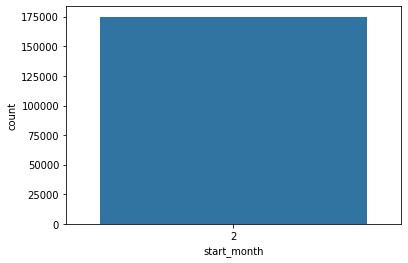

In [75]:
# Checking month distribution
sb.countplot(data=bike_df, x='start_month')

<AxesSubplot:xlabel='start_year', ylabel='count'>

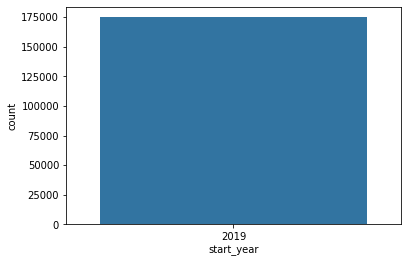

In [77]:
# Checking year distribution
sb.countplot(data=bike_df, x='start_year')

It seems all the data entries share the same year and month and so we can't make use of any distribution regarding those.

Text(0.5, 0, 'Week Day')

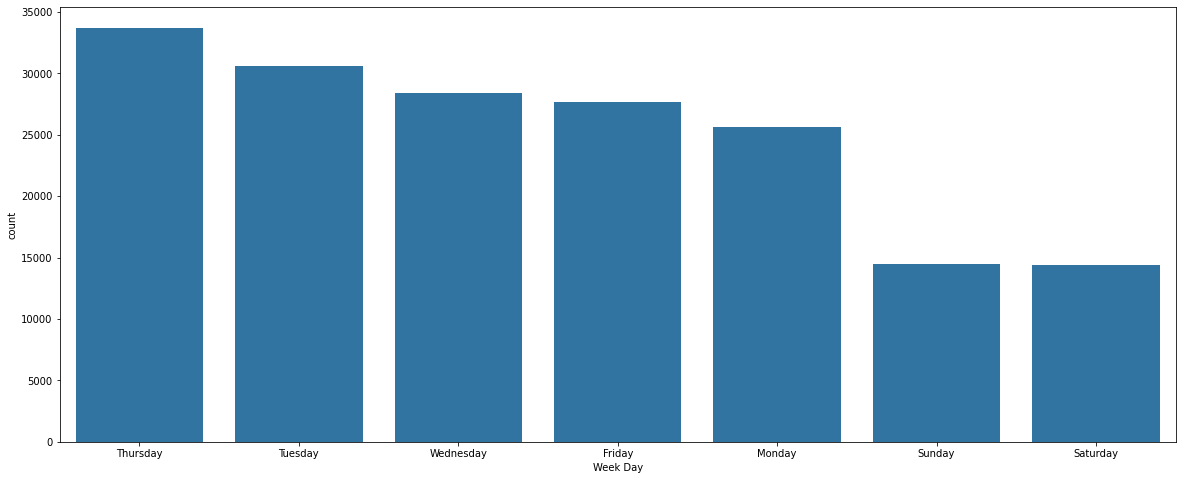

In [239]:
# Replace weekday numbers with names for better readability and check distribution
bike_df["start_weekday"].replace({0: "Monday", 1: "Tuesday", 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)
plt.figure(figsize=(20,8))
sb.countplot(data=bike_df, x='start_weekday', color = sb.color_palette()[0], order = bike_df.start_weekday.value_counts().index)
plt.xlabel('Week Day')

It seems the most common starting weekday is 3 (Monday is represented with 0 so 3 is Thursday) with Saturday (5) and Sunday (6) being the least common starting days. Next, we will look at most common starting hour and then I will compare this to the end metrics.

Text(0.5, 0, 'Starting Hour')

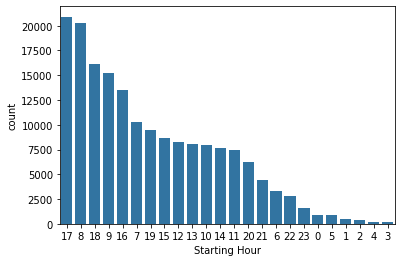

In [242]:
# Check distribution of starting hours descendingly
sb.countplot(data=bike_df, x='start_hour', color = sb.color_palette()[0], order = bike_df.start_hour.value_counts().index)
plt.xlabel('Starting Hour')

Focusing on the top 5 which have much higher frequencies compared to the other recorded hours, it seems that most trips occur either early in the morning (around 8 or 9am), or later in the evening (around 4 to 6pm). I think this makes sense since these times are away from usual working hours for most people and they might also offer the best weather conditions for a bike trip.

Now, let's take a look at end times.

In [2]:
# Same as above but with end time
bike_df['end_weekday'] = bike_df.end_time.dt.weekday
bike_df['end_month'] = bike_df.end_time.dt.month
bike_df['end_year'] = bike_df.end_time.dt.year
bike_df['end_hour'] = bike_df.end_time.dt.hour
bike_df.head()

NameError: name 'bike_df' is not defined

<AxesSubplot:xlabel='end_weekday', ylabel='count'>

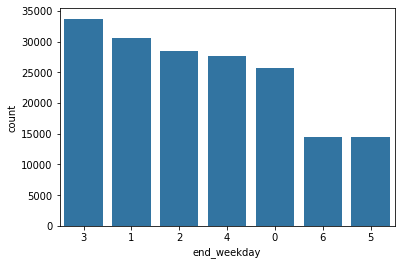

In [85]:
sb.countplot(data=bike_df, x='end_weekday', color = sb.color_palette()[0], order = bike_df.end_weekday.value_counts().index)

As expected, the end weekday frequencies are similar to the start weekday frequencies as I don't expect this service to allow bikes to be taken for whole days at a time. 

<AxesSubplot:xlabel='end_hour', ylabel='count'>

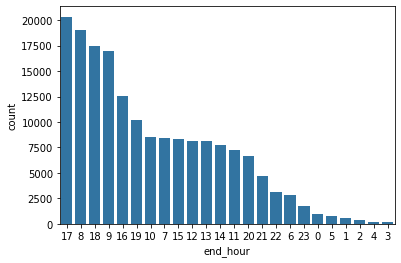

In [86]:
sb.countplot(data=bike_df, x='end_hour', color = sb.color_palette()[0], order = bike_df.end_hour.value_counts().index)

End hours are also very similar to start hours which coincides with the idea that trip durations were usually in minutes and rarely took full hours at a time. 

### Are certain bikes used more than others? According to bike_id

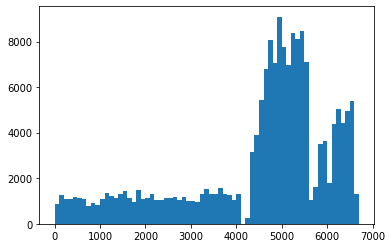

In [92]:
plt.hist(data=bike_df, x='bike_id', bins = np.arange(0, bike_df.bike_id.max()+100, 100));

Looking at the distribution of bike_id, it seems that certain bikes were used alot more than others.
- bikes with ids in the 5000s had the most usage roughly, followed by 6000 and 7000 range ids
- bikes with ids near 4000 were rarely used and it looks like some ids weren't even used at all
- Usage for ids between 0 and 4000 seem to be very uniform which is very interesting.

This leads me to believe that maybe certain bikes might be confined to certain stations and so they were used alot more if they were in stations with already high traffic.
Or, maybe subscribers got to reserve certain bikes for their own exclusive use and this lead to this uneven distribution. This is worth looking into.

### What are the metrics concerning the members themselves and what are their distributions?

(1900.0, 2010.0)

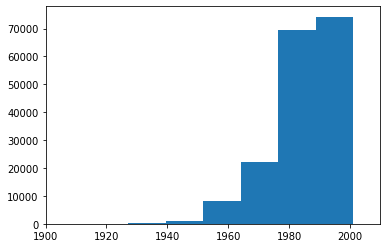

In [96]:
plt.hist(data =bike_df, x='member_birth_year')
# Limiting to this range to avoid outliers
plt.xlim(1900, 2010)

Most bike users seem to be born in years following 1980. So most users (given that this dataset was created in 2019) were around 40 years old and younger. There seems to be a complete cutoff at 2000 which may lead me to believe that this dataset was meant to only include users with birthyears up to 2000. 

<AxesSubplot:xlabel='user_type', ylabel='count'>

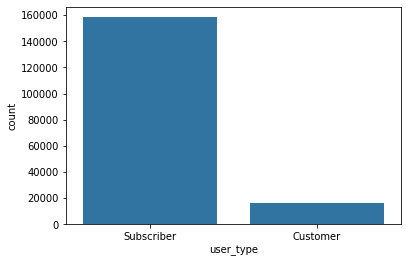

In [99]:
sb.countplot(data=bike_df, x='user_type', color=sb.color_palette()[0])

There seems to be way more subscribers than customers in this dataset which might make this data heavily biased. This also makes me wonder if maybe the rows I dropped were mostly customer rows. I will reread the dataset and check.

<AxesSubplot:xlabel='user_type', ylabel='count'>

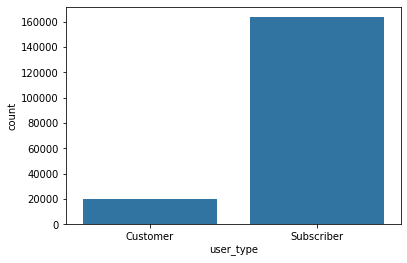

In [100]:
bike_df_fresh = pd.read_csv('biketripdata.csv')
sb.countplot(data=bike_df_fresh, x='user_type', color=sb.color_palette()[0])

No it doesn't seem like that was the case as the difference is still very noticeable.

<AxesSubplot:xlabel='member_gender', ylabel='count'>

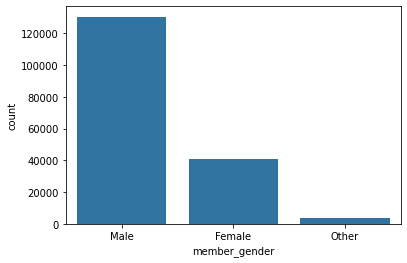

In [101]:
sb.countplot(data=bike_df, x='member_gender', color=sb.color_palette()[0])

It seems like users were mostly men.

### The main points from our univariate exploration are the following:
* Most common trip duration is around 6 minutes and quickly drops off
* Most common starting and ending weekday is Thursday and least common are Saturday and Sunday
* Most common starting and ending hours seem to be either around 8-9am or 4-6pm
* Certain bikes are used alot more than others and these bikes are usually linked to higher ids from around 5000+
* Users are mostly subscribers and are mostly men

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Is there actually a strong similarity between start and end hour?

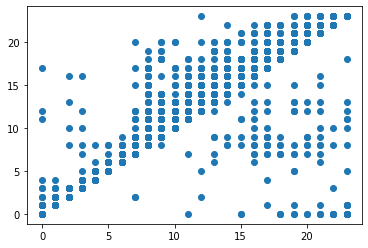

In [103]:
plt.scatter(data=bike_df, x='start_hour', y='end_hour')

Text(33.0, 0.5, 'Hour')

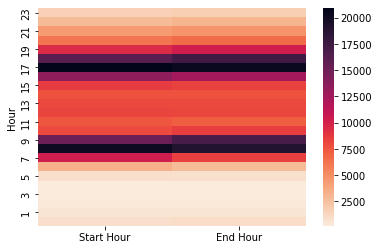

In [133]:
# Put start and end hour columns into 2d matrices
starthourdf = bike_df.start_hour.value_counts().reset_index().set_index('index').sort_index()
endhourdf = bike_df.end_hour.value_counts().reset_index().set_index('index').sort_index()
# print(starthourdf)
# Join two matrices with common index to obtain a 3d matrix
hours_df = starthourdf.join(endhourdf.end_hour)
# Reverse the dataframe to obtain hours from 0 to 24 bottom to top
hours_df = hours_df.iloc[::-1]
# print(hours_df)
sb.heatmap(hours_df, cmap='rocket_r', xticklabels = ['Start Hour', 'End Hour'])
plt.ylabel('Hour')

I tried to visualize this relation using a scatter plot but since the start_hour is just discrete values, I decided to put it in a heatmap in a way as to resemble a timeline. Start and end hour seem basically the same like we observed before.

### Which start hours usually are associated with the longest trips?

<AxesSubplot:xlabel='start_hour', ylabel='duration_sec'>

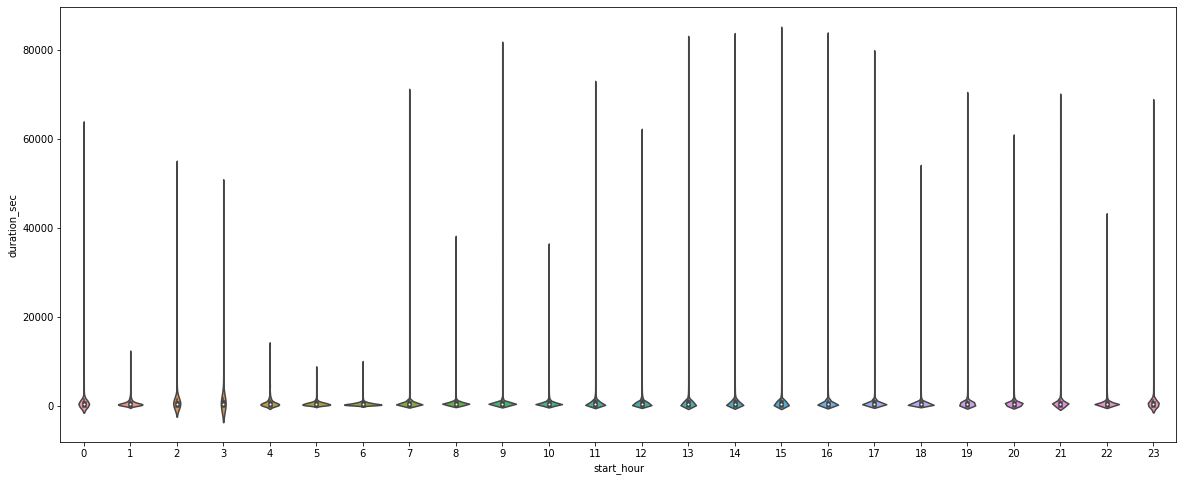

In [142]:
plt.figure(figsize=[20,8])
sb.violinplot(data=bike_df, x='start_hour', y='duration_sec')

The number of values outside the small trip duration range are so many that it makes the graph not look the best. I will try to graph the average trip duration per hour.

In [144]:
# Calculate duration mean for each start hour subset individually
duration_means = []
for x in range(0, 24):
    # subset database to include only the hour (x)
    h = bike_df.loc[bike_df.start_hour == x]
    duration_means.append(h.duration_sec.mean())
print(duration_means)

[808.895856662934, 652.4514285714286, 1069.7802816901408, 1471.8841463414635, 685.1894273127754, 601.2540415704387, 534.7837837837837, 613.7694262535432, 656.1707618529688, 651.7303998947646, 698.3483061480553, 802.7276504490014, 777.5199513381995, 829.559150407508, 827.4010681255699, 812.8431644691186, 722.0658353744526, 704.6831706850363, 641.7808040699839, 684.8233234295416, 674.2337787795846, 712.6572727272727, 612.3548156104547, 793.9599236641221]


c:\users\legion\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


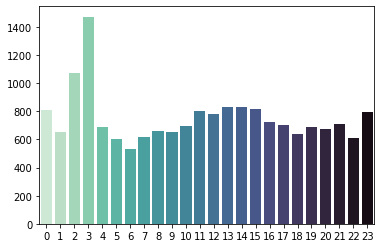

In [151]:
sb.barplot(list(range(0,24)), duration_means, palette='mako_r');

There seems to be a weird spike in duration at 2 and 3am. While the rest of the distribution seems very close in duration averages. I used the mako reversed palette because I felt it represented the lighting across the day.

### Which weekdays are usually associated with the longest trips?

<AxesSubplot:xlabel='start_weekday', ylabel='duration_sec'>

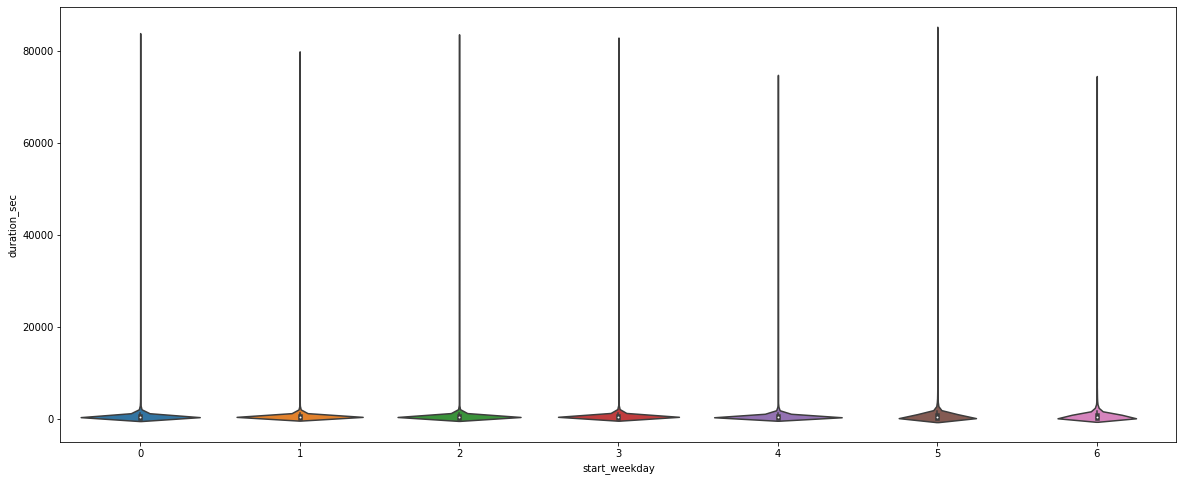

In [152]:
plt.figure(figsize=[20,8])
sb.violinplot(data=bike_df, x='start_weekday', y='duration_sec')

I wanted to look at duration vs weekdays but we have the same problem so I'll use the same approach as the previous graph.

In [153]:
# Same as above but with weekdays
durationday_means = []
for x in range(0,7):
    h = bike_df.loc[bike_df.start_weekday == x]
    durationday_means.append(h.duration_sec.mean())
print(durationday_means)

[696.970905970906, 652.8394585404133, 665.1279462463941, 678.2897484575226, 681.2746990565015, 849.7717496878035, 858.6736493936053]


c:\users\legion\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


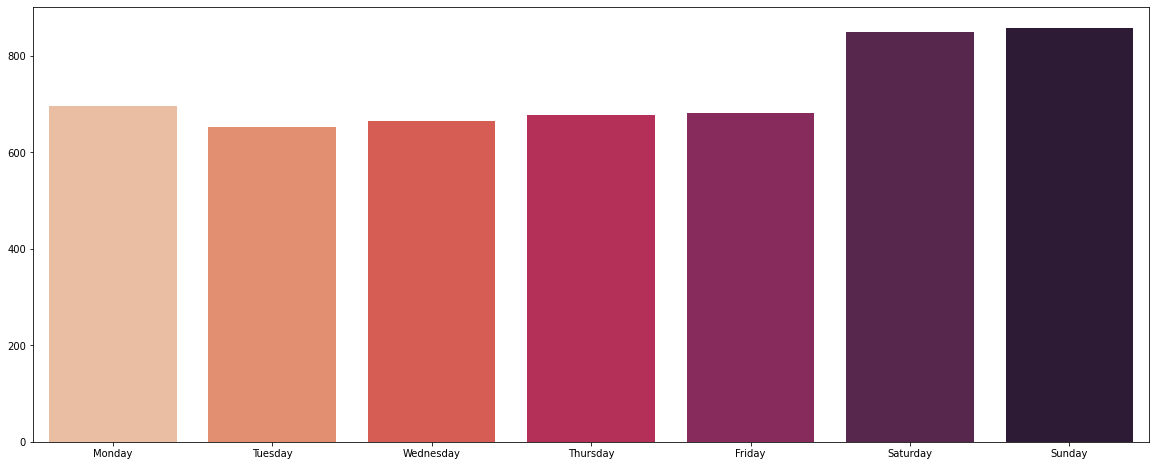

In [244]:
plt.figure(figsize=(20,8))
sb.barplot(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], durationday_means, palette='rocket_r');

While Day 3 (Thursday) was the most common for trips, it seems that 5 and 6 (Saturday & Sunday) had the longest trips on average and this might be because that these days usually coincide with non-working days for most people and so people might be a bit more care-free and so they ride longer for leisure perhaps. 

### Is the bike_id abnormal distribution due to subscription?

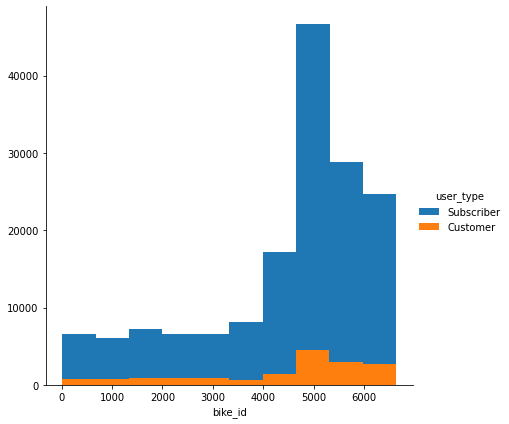

In [164]:
g = sb.FacetGrid(data=bike_df, hue='user_type', height=6)
g.map(plt.hist, 'bike_id')
g.add_legend()

Both user types seem to have a spike at bike_ids around 5000 so this might lead me to believe that this spike isn't due to subscription and it might be due to location. Maybe bikes with an id of 5000 or above are just situated in locations with high traffic, this is what I will inspect next.

### Is it due to location? 

<AxesSubplot:xlabel='start_station_id', ylabel='bike_id'>

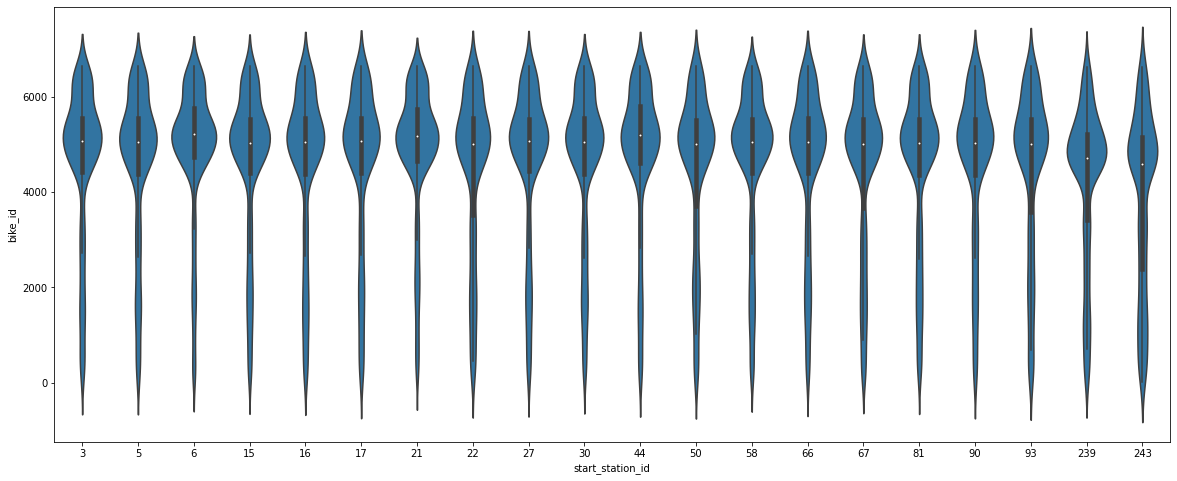

In [173]:
# Obtain subset that includes only top 20 start station names which were formulated before
bike_df_sub = bike_df.loc[bike_df.start_station_name.isin(start_names)]
plt.figure(figsize=[20,8])
sb.violinplot(data=bike_df_sub, x='start_station_id', y='bike_id', color=sb.color_palette()[0])

Yes. It seems that most of the bike ids in the top 20 start stations are in fact in the 4000-6000 range with a common peak around 5000. This explains why these bike_ids are the most common.

### Are subscriptions more common among a certain gender or birth year?

c:\users\legion\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


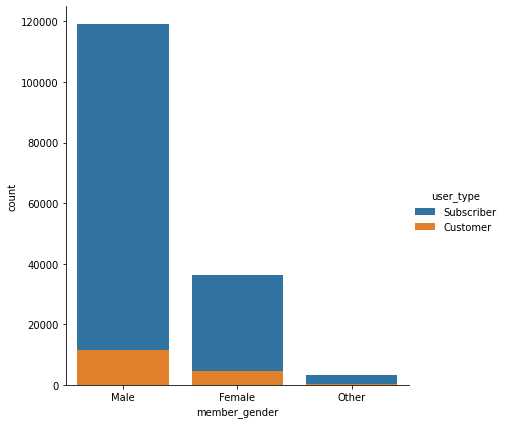

In [181]:
g = sb.FacetGrid(data=bike_df, hue='user_type', height=6)
g.map(sb.countplot, 'member_gender')
g.add_legend()

There doesn't seem to be any noticeable correlation between gender and subscription. I will check for correlation between age and subscription.

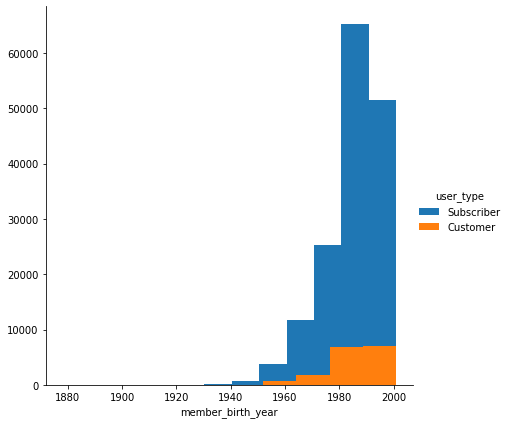

In [183]:
g = sb.FacetGrid(data=bike_df, hue='user_type', height=6)
g.map(plt.hist, 'member_birth_year')
g.add_legend()

There might be a small biased of customers towards younger users but given the frequency distribution, it doesn't seem very significant.

### Are younger people inclined to take longer trips than older people?

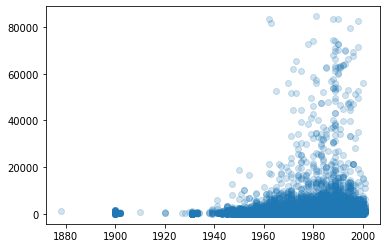

In [186]:
plt.scatter(data=bike_df, x='member_birth_year', y='duration_sec', alpha=1/5)
# Limit birth year once again to avoid outliers
plt.xlim(1920, 2000)

It seems that younger users have shorter trips mostly. But also any trips that have longer durations are usually near the younger spectrum more consistently.

In [1]:
plt.scatter(data=bike_df, x='member_birth_year', y='duration_sec', alpha=1/5)
# Same as above
plt.xlim(1920, 2005)

NameError: name 'plt' is not defined

After zooming in, it seems like most long trips do in fact appear on the younger spectrum. Older people very consistently take shorter trips.

### The main points from our bivariate exploration are the following:
* start_hour and end_hour are almost exactly similar which backs up our previous claim
* Average trip duration for every hour of the day seems similar with the exception of 2 and 3 am which have abnormal spikes, and a decrease at 6am
* Longer trip durations are mostly on Saturday and Sunday
* The previous bike_id observation is due to the fact that the most popular stations (top 20) all have bike ids around 5000 and it was not due to subscription.
* Doesn't seem to be any correlation between subscription type and age or gender
* Longer trips are mostly done by younger users

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### I want to see a visual that shows duration as a function of start hour and start day

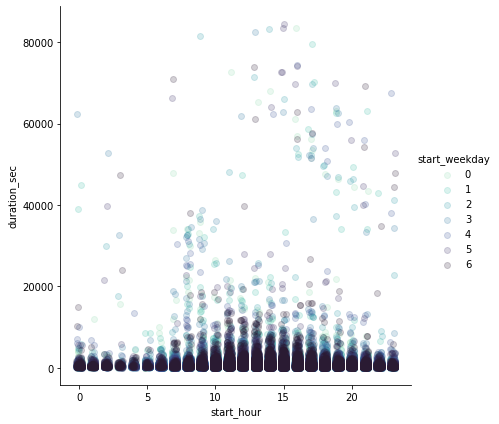

In [203]:
g = sb.FacetGrid(data=bike_df, hue='start_weekday', height=6, palette = 'mako_r')
# adding jitter and transparency due to the intense overlapping and removing automatic regression line
g.map(sb.regplot, 'start_hour', 'duration_sec', x_jitter=0.2, scatter_kws = {'alpha' : 1/5}, fit_reg=False)

g.add_legend()

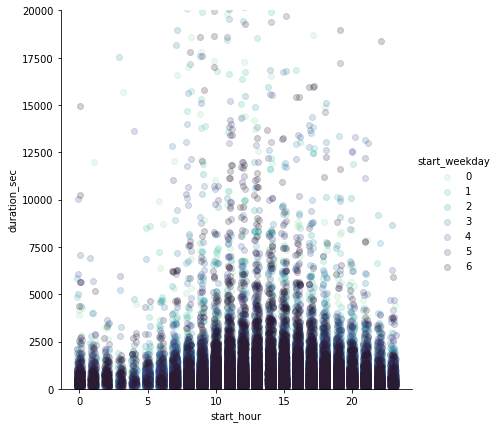

In [204]:
g = sb.FacetGrid(data=bike_df, hue='start_weekday', height=6, palette = 'mako_r')
# Same as above but with y limit to focus on a smaller area
g.map(sb.regplot, 'start_hour', 'duration_sec', x_jitter=0.2, scatter_kws = {'alpha' : 1/5},fit_reg=False)
g.set(ylim=(0,20000))
g.add_legend()

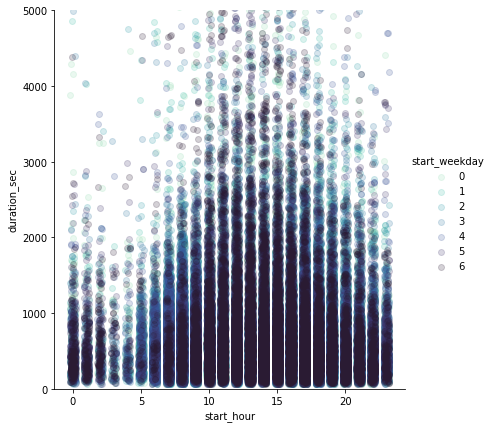

In [206]:
g = sb.FacetGrid(data=bike_df, hue='start_weekday', height=6, palette = 'mako_r')
g.map(sb.regplot, 'start_hour', 'duration_sec', x_jitter=0.2, scatter_kws = {'alpha' : 1/5}, fit_reg=False)
g.set(ylim=(0,5000))
g.add_legend()

It seems that most short trips occur on later days of the week mostly regardless of start hour except the time interval between about 3 and 5 which seems to host less trips and on earlier weekdays. Most long trips also seem to be near the beginning of the week or the middle. 

### A graphic that joins all important user metrics

c:\users\legion\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


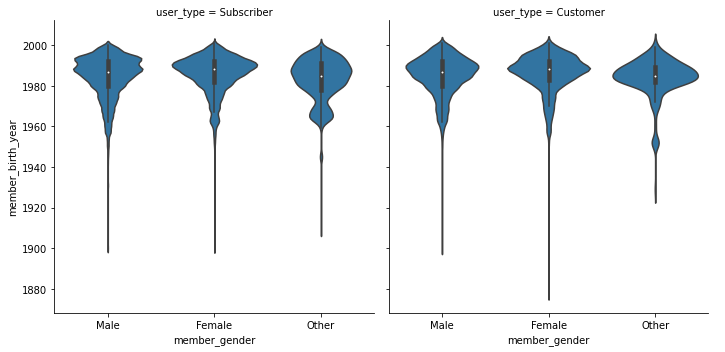

In [218]:
g = sb.FacetGrid(data=bike_df, col='user_type', height=5)
g.map(sb.violinplot, 'member_gender', 'member_birth_year')
g.add_legend()

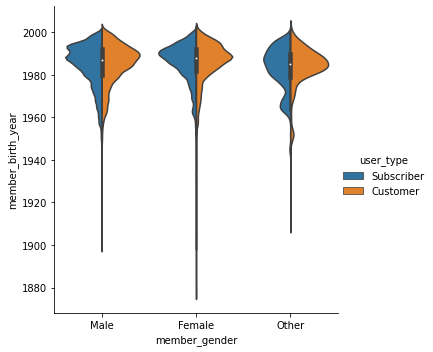

In [220]:
g = sb.catplot(data=bike_df, x="member_gender", y="member_birth_year",hue="user_type", kind="violin", split=True,height=5);

Distribution among subscribers and customers seem mostly the same except a sharper peak in the "Other" gender in customers which makes sense as customers might include people who don't want to share their information. Other than that, male subscribers show a bimodal distribution in comparison to a unimodal male customers distribution and subscribers feature more older users in the "Other" gender category.

### The activity hotspots of the top few stations to see if there's any abnormalities.

In [227]:
# Obtain top 15 start station names
station_names = bike_df.start_station_name.value_counts().index[:15]
# list of all day hours
hours = list(range(0,24))
heatmap = []
# For each name we generate the duration mean for each hour of the day and put it into a list
for name in station_names:
    row =[ ]
    for hour in hours:
        # Subsetting name and hour for each hour
        df_sub = bike_df.loc[bike_df.start_station_name == name]
        df_sub2 = df_sub.loc[df_sub.start_hour == hour]
        row.append(df_sub2.duration_sec.mean())
    heatmap.append(row)
# print(heatmap)
# This produces a list of lists which can be converted into a dataframe
heatmap_df = pd.DataFrame(heatmap).set_index(station_names)
heatmap_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Market St at 10th St,571.133333,735.666667,771.500000,492.500000,1654.0,468.166667,468.769231,531.160584,541.139706,735.587537,...,575.212329,665.577640,808.665455,627.366316,590.108974,619.254386,533.470199,508.681159,661.947368,658.846154
San Francisco Caltrain Station 2 (Townsend St at 4th St),459.100000,NaN,NaN,NaN,102.0,770.000000,496.681319,566.323308,571.080100,695.270742,...,619.439024,559.703704,592.283784,673.402827,667.528708,646.292683,804.357895,642.885714,467.142857,488.956522
Berry St at 4th St,693.000000,191.000000,1336.000000,NaN,412.0,455.000000,577.166667,596.805825,562.505882,768.382022,...,899.250000,613.361702,621.329268,693.510476,608.290076,610.418803,600.455882,733.193548,611.785714,567.000000
Montgomery St BART Station (Market St at 2nd St),425.200000,275.666667,1193.750000,281.000000,521.0,971.000000,395.767442,411.477778,574.681452,463.767241,...,968.269231,646.200000,644.718750,852.490157,707.752508,1266.748387,1202.794118,547.324324,518.700000,602.733333
Powell St BART Station (Market St at 4th St),594.454545,550.000000,813.285714,NaN,658.5,679.333333,537.529412,572.431818,577.823129,576.489899,...,1628.165644,1484.604317,1159.955357,682.885246,703.007117,663.268421,704.428571,660.349057,875.038462,531.750000
San Francisco Caltrain (Townsend St at 4th St),473.400000,NaN,NaN,NaN,NaN,434.000000,476.254902,660.292000,660.729091,682.615160,...,2425.312500,732.822581,648.201754,696.725995,602.494118,593.881188,680.137255,669.478261,714.375000,299.000000
San Francisco Ferry Building (Harry Bridges Plaza),NaN,486.714286,NaN,NaN,NaN,548.777778,677.094340,583.011299,618.420000,672.754464,...,1586.963303,1119.824742,778.361386,772.832869,783.824121,751.021277,1923.846154,753.789474,950.000000,814.642857
Howard St at Beale St,1350.500000,491.000000,1734.000000,NaN,NaN,771.250000,518.489796,577.830000,578.951777,555.801325,...,766.260870,561.509259,573.432558,693.118056,717.720670,659.795181,774.803571,670.600000,696.692308,368.500000
Steuart St at Market St,975.000000,310.600000,NaN,NaN,NaN,532.000000,556.237288,552.200000,593.196133,734.822314,...,747.190476,745.700000,658.867580,708.984314,770.702564,828.818182,687.769231,621.411765,814.500000,724.000000
Powell St BART Station (Market St at 5th St),602.500000,5586.333333,5952.500000,783.500000,NaN,515.666667,500.861111,1100.363636,421.302198,524.537313,...,1103.917647,982.565217,674.051282,1000.418972,725.943089,966.828947,1257.989691,541.578125,684.350000,637.400000


<AxesSubplot:>

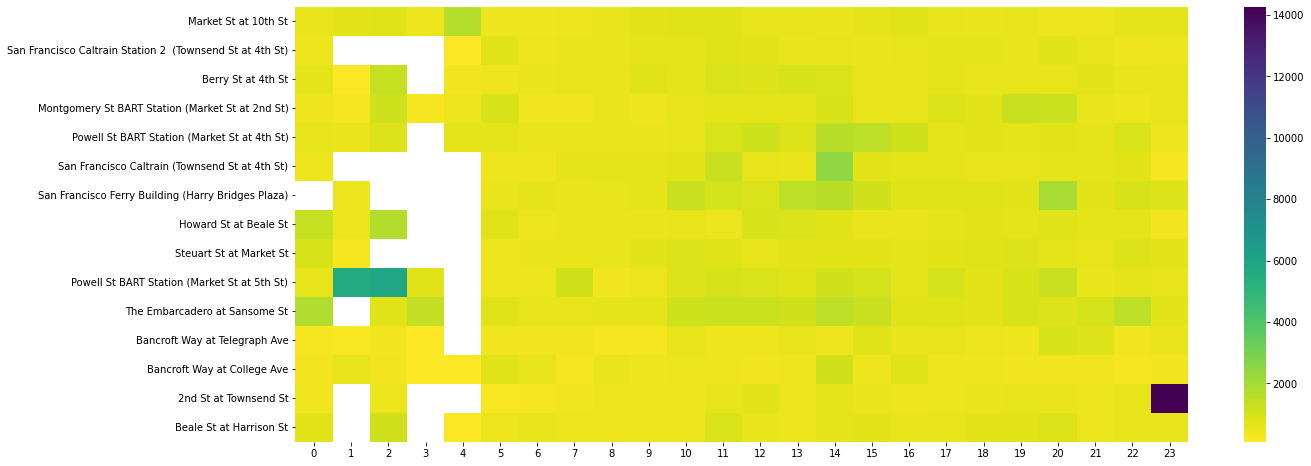

In [232]:
plt.figure(figsize=[20,8])
sb.heatmap(heatmap_df, cmap='viridis_r')

Through this heatmap that depicts the average trip duration for each hour of the day for each of the top 15 start stations, there seems to be 2 main observations.
1. Earlier hours of the day experience much less traffic which makes sense except for Powell St BART Station which experiences a hot point at hour 1 and 2 am (I'm not sure why). There are also hotter spots for certain stations at specific hours but mostly they're all in the same low range.
2. After 5am, the activity becomes mostly uniform except for one super high spot at 11 pm at 2nd St.

### The main points from our multivariate exploration are the following:
* Most short trips occur on later days of the week mostly regardless of start hour except the time interval between about 3 and 5 which seems to host less trips and on earlier weekdays. Most long trips also seem to be near the beginning of the week or the middle. 
* Male subscribers show a bimodal age distribution in comparison to unimodal male customers and subscribers feature more older users in the "Other" gender category
* In the top 15 stations, earlier hours of the day feature relatively low traffic with a few exceptions for one or 2 stations.
* In the top 15 stations, after 5am, activity becomes mostly uniform except for one super high spot at 11 pm at 2nd St.

However, it should be noted that the last heatmap (2 observations) can be subject to heavy biased since some hours of the day have more data points surrounding them than others and also some of these stations might have most of their trips during a certain time interval of the day and have very few trips otherwise.